Human geographic data or anthropogeographic data is a branch of geographic data that deals with humans and their relationship to the area around them.
United States Census Bureau data
Within the United States, the Census Bureau is one of the best sources of geo-demographic data. Geo-demographic data is location-based data that segments individuals based on their locale as well as their demography. The Census Bureau collects this data via various programs including the decennial census as well as the yearly ACS, the biennial American Housing Survey (AHS), and the yearly American Business Survey (ABS). The following subsections provide more details on census data structure and its unique IDs (UIDs).
GEOIDs
As mentioned previously, census data products include geographic entity codes or GEOIDs. There are two primary types of GEOIDs: Federal Information Processing Standards (FIPS) codes and Geographic Names Information System (GNIS) codes.
FIPS codes
The Census Bureau started publishing FIPS codes with its data products over 30 years ago. FIPS codes are assigned in alphabetical order by geography name for states, counties, core-based statistical areas (CBSAs), and county subdivisions. The FIPS code system typically ensures that smaller geographic units are unique within larger geographic units. That is to say that FIPS codes for states are unique within a country and counties are unique within a state. Due to this structure, most census geographies nest neatly inside one another, as shown in Figure 2.11.
For some data products that use FIPS codes, they do not sit neatly next to the standard hierarchy of census geographic entities. Some of these areas include urban areas, CBSAs, state legislative districts, and ZIP code tabulation areas, to name a few. In the following diagram, these special cases are shown as lines to the side of the standard hierarchy:

![census](./image/census.jpg)

FIPS codes are 15 digits long, with the first 2 digits representing the state, the next 3 digits representing the county, the next 6 digits representing the census tract, the next digit representing the block group, and the final 3 digits representing the individual census block.
FIPS code 390017701001000 can be read as follows:
•	39—Ohio (black)
•	001—Adams County (blue)
•	770100—Census tract within Adams County (red)
•	1—Block group within tract 770100 (green)
•	000—Block within block group 1 (purple)



In [1]:
import geopandas as gpd

In [ ]:
# Reading in the Ohio geography
ohio = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')
ohio = ohio[ohio['STUSPS']=="OH"]

# Reading in the Adams County Ohio geography
AC = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip")
AC = AC[(AC['STATEFP']=="39") & (AC['COUNTYFP'] == "001")]

# Reading in the 770100 tract geography
AC_T = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_39_tract.zip")
AC_T = AC_T[(AC_T['STATEFP']=="39") & (AC_T['TRACTCE'] == "770100")]

# Reading in the 1 block group geography
AC_BG = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2021/BG/tl_2021_39_bg.zip')
AC_BG = AC_BG[(AC_BG['TRACTCE'] == "770100") & (AC_BG['BLKGRPCE'] == "1")]

# Reading in the 000 block geography
AC_B = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/TABBLOCK20/tl_2021_39_tabblock20.zip")
AC_B = AC_B[(AC_B['TRACTCE20'] == "770100") & (AC_B['BLOCKCE20'] == '1000')]


In [ ]:
from matplotlib import pyplot
# Plotting the Census Hierarchy

fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(ncols=4, sharex=False, sharey=False,figsize=(15,15),)

# First Column Plots
ohio.plot(ax=ax1, edgecolor='black', color='white')
AC.plot(ax=ax1, edgecolor='blue', color='white')
AC_T.plot(ax=ax1, edgecolor='red', color='white')
AC_BG.plot(ax=ax1, edgecolor='green', color='white')
AC_B.plot(ax=ax1, edgecolor='purple', color='white')

# 2nd Column Plots
AC.plot(ax=ax2, edgecolor='blue', color='white')
AC_T.plot(ax=ax2, edgecolor='red', color='white')
AC_BG.plot(ax=ax2, edgecolor='green', color='white')
AC_B.plot(ax=ax2, edgecolor='purple', color='white')

# 3rd Column plots
AC_T.plot(ax=ax3, edgecolor='red', color='white')
AC_BG.plot(ax=ax3, edgecolor='green', color='white')
AC_B.plot(ax=ax3, edgecolor='purple', color='white')

# 4th Column plots
AC_BG.plot(ax=ax4, edgecolor='green', color='white')
AC_B.plot(ax=ax4, edgecolor='purple', color='white')

Now do the same thing for Illinois

In [2]:
illinois = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')
illinois = illinois[illinois['STUSPS']=="IL"]

<Axes: >

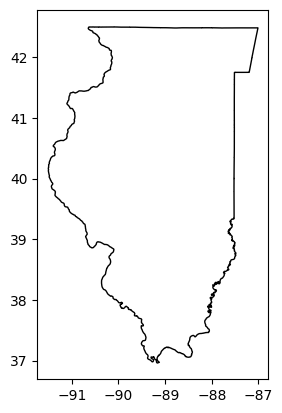

In [5]:
from matplotlib import pyplot
illinois.plot(edgecolor='black', color='white')